PARAMÉTRICAS
p-valor: cuando > 0,05 no hay evidencia suficiente para rechazar Ho, Si < 0,05 no hay evidencia suficiente para aceptar Ho
Error tipo 1: rechazar Ho siendo verdadera (falso positivo)
Error tipo2: acpetar Ho siendo falsa (falso negativo)
Homocedasticidad: que la varianza sea muy similar

si nuestra columna de metricas son 0 y 1 usamos z score (Es decir el Z score es para calcular proporciones)

Asunciones:  

Normalidad:  
  - shapiro_ tamaño muestral pequeño <=30 en test y 30 en control
  - ruso: más de 30
  
Homocedasticidad:  

- levene: para cuando la distribucion no es perfectamente normal (hay colitas)  

- barlett: para cuando la distribución sea perfectamente normal

NO PARAMETRICAS

In [4]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib as plt
import numpy as np



In [2]:
ab_test=pd.read_csv("datos/ab_data.csv")

In [3]:
ab_test.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df_tasa_total_total= round(ab_test.groupby("group")["converted"].sum() /ab_test.shape[0] *100, 2) #el 0 es para que me de las filas

In [5]:
df_tasa_total_total

group
control      6.02
treatment    5.95
Name: converted, dtype: float64

In [6]:
df_tasa_total_grupo=round(ab_test.groupby("group")["converted"].mean() *100, 2)

In [7]:
df_tasa_total_grupo

group
control      12.04
treatment    11.89
Name: converted, dtype: float64

In [10]:
stats.shapiro(ab_test["converted"])

C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 294478.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.3783523831943343), pvalue=np.float64(7.449811514912522e-196))

In [11]:
stats.kstest(ab_test["converted"], "norm")

KstestResult(statistic=np.float64(0.5), pvalue=np.float64(0.0), statistic_location=np.int64(0), statistic_sign=np.int8(-1))

In [14]:
stats.shapiro(ab_test[ab_test["group"] == "treatment"]["converted"])

C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 147276.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.3770708618973132), pvalue=np.float64(1.2868242482786525e-178))

In [15]:
stats.shapiro(ab_test[ab_test["group"] == "control"]["converted"])

C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 147202.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.3796275611064569), pvalue=np.float64(1.8454516993263413e-178))

Al tener ambos p-values > 0,05 no hay evidencia suficiente para rechazar Ho con lo que aceptamos que son distribuciones normales.  

<Axes: xlabel='converted', ylabel='Count'>

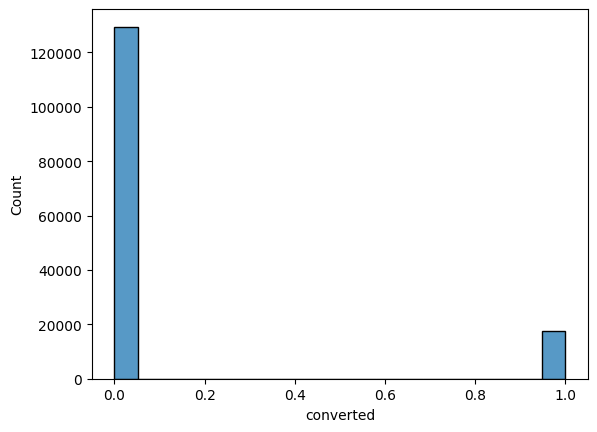

In [17]:
sns.histplot(x="converted", data=ab_test[ab_test["group"]== "control"])

<Axes: xlabel='converted', ylabel='Count'>

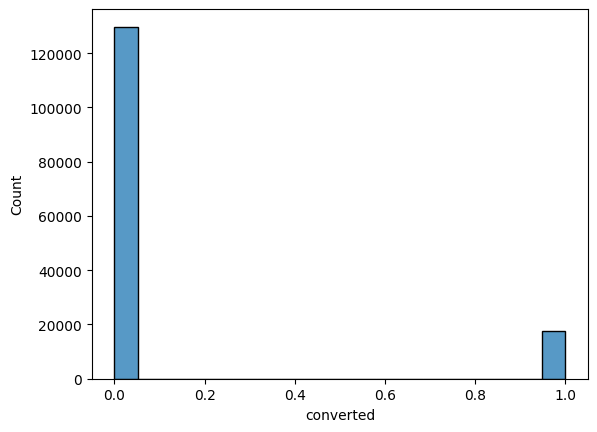

In [18]:
sns.histplot(x="converted", data=ab_test[ab_test["group"]== "treatment"])

NUEVOS DATOS

In [73]:
# generamos los datos ficticios del Grupo A (versión actual)
grupo_a = np.random.normal(60, 10, 30)

# generamos los datos ficticion del Grupo B (variación de diseño)
grupo_b = np.random.normal(65, 10, 30)

# generamos los datos ficticios del Grupo C (variación de contenido)
grupo_c = np.random.normal(55, 10, 30)

# Crear DataFrame
df_anova = pd.DataFrame({
    'grupo': ['A'] * 30 + ['B'] * 30 + ['C'] * 30,
    'tiempo_promedio': np.concatenate([grupo_a, grupo_b, grupo_c])
})

# Visualizar los primeros registros del DataFrame
df_anova.sample(6)

,grupo,tiempo_promedio
17,A,73.139711
67,C,72.863450
82,C,58.649970
36,B,56.761668
8,A,58.757770
9,A,85.182144


In [26]:
stats.shapiro(df_anova[df_anova["grupo"] == "C"]["tiempo_promedio"])  #filtro por el grupo y me quedo solo con la métrica

ShapiroResult(statistic=np.float64(0.9478646419705969), pvalue=np.float64(0.1481598372525738))

<Axes: xlabel='tiempo_promedio', ylabel='Count'>

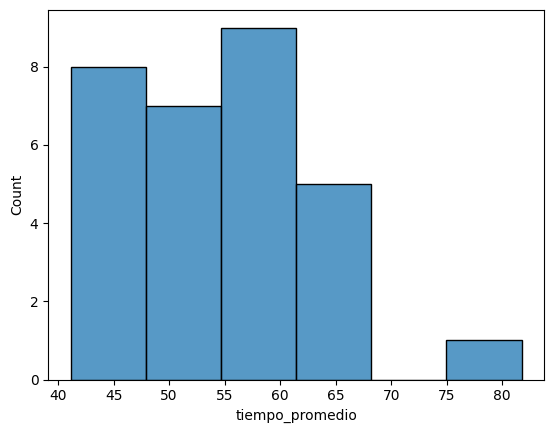

In [24]:
sns.histplot(x="tiempo_promedio", data=df_anova[df_anova["grupo"]== "C"])

COMPROBAR LA HOMOCEDASTICIDAD

In [25]:
stats.bartlett(df_anova[df_anova["grupo"]== "C"]["tiempo_promedio"], df_anova[df_anova["grupo"]== "A"]["tiempo_promedio"], df_anova[df_anova["grupo"]== "B"]["tiempo_promedio"])

BartlettResult(statistic=np.float64(0.9022489387096886), pvalue=np.float64(0.6369115612729388))

No hay evidencia suficiente para rechazar Ho, es decir, que es homocedástico

BARLETT

In [ ]:
def calcular_bartlett(df, columna_grupos, columnas_metrica):
    unicos=df[columna_grupos].unique()   #lista de grupos
    for grupo in unicos:
        df_metrica= df[df[columna_grupos]== grupo][columnas_metrica]
        globals()[grupo] = df_metrica                                   #globals permite poner un parametro de una funcion en la variable a definir (de normal no se puede)
                                                                        #basicamente el globals lo empaqueta en un especie de diccionario en la que lo unico que se almacena en unicos (lista_grupo) son los nombres A B y C


    print(stats.bartlett(*[globals()[var] for var in unicos]))                  #al desempaquetar, de la A obtenemos sus estadisticos el * es para quitar la lista

calcular_bartlett(df_anova, "grupo", "tiempo_promedio")

BartlettResult(statistic=np.float64(0.9022489387096325), pvalue=np.float64(0.6369115612729567))


Calculo ahora un anova porque tengo 3 grupos

In [32]:
df_anova.head()

,grupo,tiempo_promedio
0,A,69.979016
1,A,49.949969
2,A,63.372267
3,A,71.033736
4,A,46.588525


<Axes: xlabel='grupo', ylabel='tiempo_promedio'>

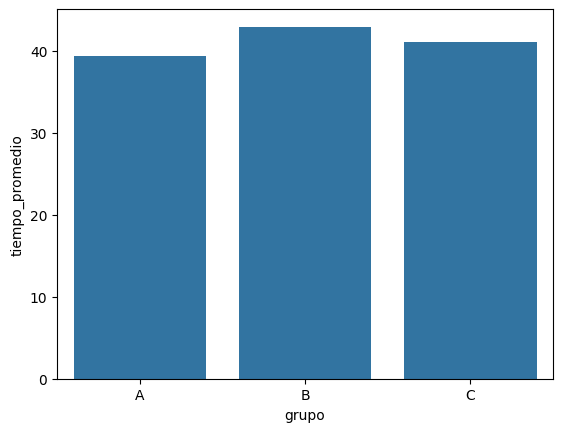

In [33]:
df_res=df_anova.groupby("grupo")["tiempo_promedio"].min().reset_index()
sns.barplot(y= "tiempo_promedio", x= "grupo", data= df_res)

ANOVA

In [36]:
def calcular_anova(df, columna_grupos, columnas_metrica):
    unicos=df[columna_grupos].unique()   #lista de grupos
    for grupo in unicos:
        df_metrica= df[df[columna_grupos]== grupo][columnas_metrica]
        globals()[grupo] = df_metrica                                   #globals permite poner un parametro de una funcion en la variable a definir (de normal no se puede)
                                                                        #basicamente el globals lo empaqueta en un especie de diccionario en la que lo unico que se almacena en unicos (lista_grupo) son los nombres A B y C


    print(stats.f_oneway(*[globals()[var] for var in unicos]))                  #al desempaquetar, de la A obtenemos sus estadisticos el * es para quitar la lista

calcular_anova(df_anova, "grupo", "tiempo_promedio")



F_onewayResult(statistic=np.float64(9.140441515929881), pvalue=np.float64(0.0002493925165120507))


T.STUDENT

In [ ]:
def calcular_ttest(df, columna_grupos, columnas_metrica):
    unicos=df[columna_grupos].unique()   #lista de grupos
    for grupo in unicos:
        df_metrica= df[df[columna_grupos]== grupo][columnas_metrica]
        globals()[grupo] = df_metrica                                   #globals permite poner un parametro de una funcion en la variable a definir (de normal no se puede)
                                                                        #basicamente el globals lo empaqueta en un especie de diccionario en la que lo unico que se almacena en unicos (lista_grupo) son los nombres A B y C


    print(stats.ttest_ind(*[globals()[var] for var in unicos]))                  #al desempaquetar, de la A obtenemos sus estadisticos el * es para quitar la lista

calcular_ttest(df_anova, "grupo", "tiempo_promedio")

Z-SCORE(no es normal, no homocedástico pero si independiene y con 0 y 1)  


si nuestra columna de metricas son 0 y 1 usamos z score (Es decir el Z score es para calcular proporciones)

le tengo que dar los tamaños muestrales(en formato lista los de control y los de test [50,50] y cuantos han convertido[19,40])

In [77]:
from statsmodels.stats.proportion import proportions_ztest

df_test=ab_test[ab_test["group"]== "treatment"]
df_control=ab_test[ab_test["group"]== "control"]



tamanio_muestral=[df_control.shape[0], df_test.shape[0]]
convertidos= [df_control["converted"].sum(), df_test["converted"].sum()]
proportions_ztest(convertidos, tamanio_muestral)  #El segundo es el p-value

(np.float64(1.2369217547321678), np.float64(0.21611613269757501))

NO PARAMETRICAS

In [41]:
control=pd.read_csv("datos/control_group.csv", sep= ";")
test=pd.read_csv("datos/test_group.csv", sep= ";")

In [42]:
df=pd.DataFrame()
df=pd.concat([df,control, test], axis=0, ignore_index=True)

In [43]:
df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df.columns=df.columns.str.lower().str.strip().str.replace("# of ", "").str.replace(" [usd]", "").str.replace(" ", "_")

In [45]:
df.head()

,campaign_name,date,spend,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df["ctr"]=df["website_clicks"]/ df["impressions"]
df["cr"]=df["purchase"] / df["website_clicks"]
df["cpa"]= df["spend"] / df["purchase"]

In [47]:
df.head()

,campaign_name,date,spend,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,ctr,cr,cpa
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.084835,0.088084,3.689320
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0.067003,0.063009,3.438356
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0.049411,0.057160,6.298387
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0.042057,0.110930,5.705882
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df[df.isnull().all(axis=1)]

,campaign_name,date,spend,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,ctr,cr,cpa


In [49]:
df[df["impressions"].isna()]

,campaign_name,date,spend,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,ctr,cr,cpa
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df[df["date"]== "5.08.2019"]

,campaign_name,date,spend,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,ctr,cr,cpa
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Test Campaign,5.08.2019,2297,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0,0.051297,0.130991,2.990885


In [51]:
df.dropna(inplace=True, how= "any")   #Me quita las filas donde haya al menos un nulo

In [52]:
df.sample()

,campaign_name,date,spend,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,ctr,cr,cpa
26,Control Campaign,27.08.2019,2061,104678.0,91579.0,4941.0,3549.0,3249.0,980.0,605.0,0.047202,0.122445,3.406612


Mann-Whitney

In [55]:
datos_control_ctr=df[df["campaign_name"]== "Control Campaign"]["ctr"]
datos_test_ctr=df[df["campaign_name"]== "Test Campaign"]["ctr"]

display(datos_control_ctr.head(2))
display(datos_test_ctr.head(2))

0    0.084835
1    0.067003
Name: ctr, dtype: float64

30    0.076814
31    0.046238
Name: ctr, dtype: float64

In [56]:
stats.mannwhitneyu(datos_control_ctr,datos_test_ctr)

MannwhitneyuResult(statistic=np.float64(193.0), pvalue=np.float64(0.00025063172993413605))

Funcion para sacar Df grupos


Esto lo hacemos porque como lo vamos a usar para el globals (crear variables) nos pueden dar problemas los espacios y minusculas

In [58]:
df["campaign_name"]=df["campaign_name"].str.split(" ", expand=True)[0]

In [67]:
#El que hice yo que casi pero está mal

def crear_df_grupo(dataframe,columna_grupo,columna_metrica):
    lista_unicos=df[columna_grupo].unique()
    for valor in lista_unicos:
        datos_filtrados=dataframe[dataframe[columna_grupo]== valor][columna_metrica]
        globals()[valor.lower()]= datos_filtrados

    elegir_test(lista_unicos)

def elegir_test(lista_unicos):
        if len(lista_unicos) > 2:
            print("El test óptimo es Kruskall-Wallis")
            resultado=stats.kruskal(*[globals()[var] for var in lista_unicos])
        elif len(lista_unicos) > 1:
            print("El test óptimo es Willcoxon")
            resultado=stats.wilcoxon(*[globals()[var] for var in lista_unicos])
        else:
            print("El test óptimo es Mann-Whitney")
            resultado=stats.mannwhitneyu(*[globals()[var] for var in lista_unicos])
        display (resultado)


In [68]:
#opción de Javi
def crear_df_grupos(df, columna_grupo, columna_metrica):

    lista_grupos = []

    for valor in df[columna_grupo].unique():

        datos_filtrados = df[df[columna_grupo] == valor][columna_metrica]
        lista_grupos.append(datos_filtrados)

    return lista_grupos


def elegir_test(datos, dependencia=False):

    if len(datos) > 2:
        print('Test Krusal Wallis')
        return stats.kruskal(*datos)

    elif len(datos) == 2 and dependencia:
        print('Wilcoxon')
        return stats.wilcoxon(*datos)

    elif len(datos) == 2 and not dependencia:
        print('Test U')
        return stats.mannwhitneyu(*datos)

    else:
        print('No hay test adecuado')

In [71]:
lista=crear_df_grupos(df,"campaign_name","ctr")
elegir_test(lista)

Test U


MannwhitneyuResult(statistic=np.float64(193.0), pvalue=np.float64(0.00025063172993413605))